# Cervical Cancer Risk Factors for Biopsy

<b>Dataset:</b> <i>kag_risk_factors_cervical_cancer_cleaned.csv</i> <br>

<b><a href="https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29">Description</b></a><br>
    
<b>Objectives:</b>
- Load and Explore the Dataset
- Split into Training and Test Set (see guidelines below)
- Build the following models using the Training Set (using default parameters):
    - KNN
    - Logistic Regression
    - Decision Tree
    - Random Forest
- Print the Accuracy Score of each model using the Test Set

<b>Guidelines:</b><br>
- Target Column: Biopsy
- Train Test Split Parameters:
    - test_size = 0.30
    - random_state = 12
- For models that have a random_state parameter:
    - random_state=12

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [135]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [136]:
#additional imports
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree

from sklearn.preprocessing import MinMaxScaler

Load Markdown

In [137]:
#load dataset
df = pd.read_csv("./risk_factors_cervical_cancer.csv", index_col=0)

In [138]:
df.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [139]:
df.describe()

,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00,858.00
mean,0.09,0.02,0.01,0.02,0.03,0.04,0.09,0.05,0.06
std,0.30,0.14,0.10,0.14,0.16,0.20,0.28,0.22,0.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [140]:
#Check the number of observations and features
df.shape

(858, 35)

In [141]:
df.dtypes

Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV                              object
STDs:Hepat

In [142]:
#pinalitan lahat ng ? sa dataset at pinalitan ng 0.0
df['Number of sexual partners'] = df['Number of sexual partners'].str.replace('?', '0.0')
df['Num of pregnancies'] = df['Num of pregnancies'].str.replace('?', '0.0')
df['Smokes'] = df['Smokes'].str.replace('?', '0.0')
df['First sexual intercourse'] = df['First sexual intercourse'].str.replace('?', '0.0')
df['Smokes (years)'] = df['Smokes (years)'].str.replace('?', '0.0')
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].str.replace('?', '0.0')
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].str.replace('?', '0.0')
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].str.replace('?', '0.0')
df['IUD'] = df['IUD'].str.replace('?', '0.0')
df['IUD (years)'] = df['IUD (years)'].str.replace('?', '0.0')
df['STDs'] = df['STDs'].str.replace('?', '0.0')
df['STDs (number)'] = df['STDs (number)'].str.replace('?', '0.0')
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].str.replace('?', '0.0')
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].str.replace('?', '0.0')
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].str.replace('?', '0.0')
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].str.replace('?', '0.0')
df['STDs:syphilis'] = df['STDs:syphilis'].str.replace('?', '0.0')
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].str.replace('?', '0.0')
df['STDs:genital herpes'] = df['STDs:genital herpes'].str.replace('?', '0.0')
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].str.replace('?', '0.0')
df['STDs:AIDS'] = df['STDs:AIDS'].str.replace('?', '0.0')
df['STDs:HIV'] = df['STDs:HIV'].str.replace('?', '0.0')
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].str.replace('?', '0.0')
df['STDs:HPV'] = df['STDs:HPV'].str.replace('?', '0.0')
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].str.replace('?', '0.0')
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].str.replace('?', '0.0')

In [143]:
#dito gagawin numeric lahat ng columns
df = df.apply(pd.to_numeric)

In [144]:
#Identify and check the value counts of the target variable
df['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

BUILD MODEL

In [145]:
#Separate the Features and the Target Variable
X = df.drop(["Biopsy"], axis=1)
y = df["Biopsy"]

In [146]:
#check yung value ng x
X

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,4.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
15,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
34,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
52,5.00,16.00,4.00,1.00,37.00,37.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,1,0,1,0,0,0,0
46,3.00,21.00,4.00,0.00,0.00,0.00,1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,3.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
32,2.00,19.00,1.00,0.00,0.00,0.00,1.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0
25,2.00,17.00,0.00,0.00,0.00,0.00,1.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,1


In [147]:
#check yung value ng y
y

Age
18    0
15    0
34    0
52    0
46    0
     ..
34    0
32    0
25    0
33    0
29    0
Name: Biopsy, Length: 858, dtype: int64

In [148]:
#dito na ii-split yung dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [149]:
#i check yung shape kung tama ba yung order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 34), (258, 34), (600,), (258,))

Scaling the Dataset

In [150]:
#gagamitin yung minmaxscaler para sa scaling
minmax = MinMaxScaler()

#i fit yung scaler para sa training set
minmax.fit(X_train)

#Transform the training set
#tapos dito i tratransform to training sit
X_train_scaled = minmax.transform(X_train)

#Transform the test set
#dito naman transform yung test set
X_test_scaled = minmax.transform(X_test)

In [151]:
#View the scaled data
X_train_scaled

array([[0.17857143, 0.46875   , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53125   , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.07142857, 0.84375   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07142857, 0.53125   , 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.07142857, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.10714286, 0.4375    , 0.3       , ..., 0.        , 0.        ,
        0.        ]])

In [116]:
#View the type of the scaled data
type(X_train_scaled)

numpy.ndarray

In [152]:
#itratranform ulit natin yung data to dataframe para mabilis syang basahin ang mga data
#Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [153]:
#Check the min, max, and mean values to determine if features are on the same scale
X_train_sdf.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25,0.18,0.47,0.40,0.00,0.00,0.00,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
37,0.00,0.53,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
36,0.07,0.84,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,0.18,0.72,0.20,0.00,0.00,0.00,1.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
24,0.04,0.50,0.30,0.00,0.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [154]:
#View the dataset
X_test_sdf.head()

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,0.11,0.53,0.60,1.00,0.38,0.17,1.00,0.23,0.00,0.00,1.00,0.25,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.55,0.55,0.00,0.00,0.00,0.00,0.00,1.00,0.00
37,0.21,0.81,0.10,0.00,0.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15,0.04,0.47,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35,0.07,0.84,0.20,0.00,0.00,0.00,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
28,0.11,0.50,0.50,1.00,0.65,1.47,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Train the model

In [155]:
#dito tayo gagamit ng decision tree for model at gagamitin natin yung randmin_state = 12
#Instantiate the Algorithm 
logreg = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=12)

In [156]:
logreg

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12)

In [157]:
y_train

Age
25    0
37    0
36    0
23    0
24    0
     ..
24    0
23    0
20    0
79    0
30    0
Name: Biopsy, Length: 600, dtype: int64

In [158]:
#Train/Fit the model
logreg.fit(X_train_sdf, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12)

In [159]:
y_train_pred = logreg.predict(X_train_sdf)

#dito natin kukunin yung confusion matrix at iba pang matrix ng ating train model

#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_train, y_train_pred)))

Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       561
           1       0.90      0.72      0.80        39

    accuracy                           0.98       600
   macro avg       0.94      0.86      0.89       600
weighted avg       0.98      0.98      0.98       600




Validate Model

In [162]:
#dito na gagawa ng prediction
#Make Predictions
y_pred = logreg.predict(X_test_sdf) # y_prediction = y_test

In [163]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))


#baka dito sabihin nyo nalng yung precision, recall, f1-score 


Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       242
           1       0.53      0.50      0.52        16

    accuracy                           0.94       258
   macro avg       0.75      0.74      0.74       258
weighted avg       0.94      0.94      0.94       258




In [164]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[235   7]
 [  8   8]]


Text(0.5, 23.5, 'Predicted label')

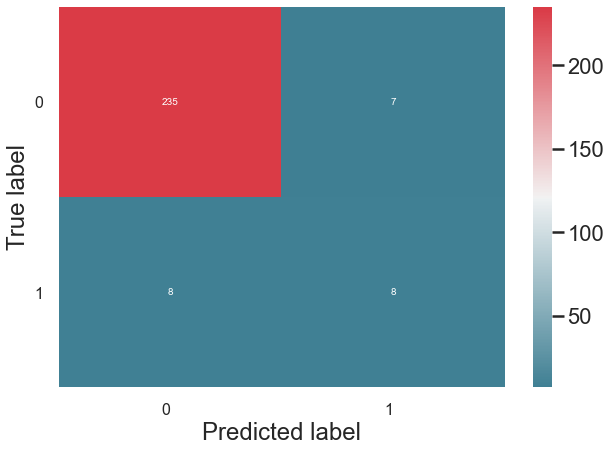

In [165]:
#dito natin makikita yung confusion matrix 

#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [166]:
#dito iprepredict yung mga probabilities

#Predict the Probabilities
pred_prob_0 = logreg.predict_proba(X_test_sdf)[:,0]
pred_prob_1 = logreg.predict_proba(X_test_sdf)[:,1]

In [167]:
#tapos dito ilalagay lahat sa dataframe para sa analysis

#Put all information on a DataFrame for analysis
df_results = X_test.copy()

df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred
df_results["Predicted_Prob(0)"] = pred_prob_0
df_results["Predicted_Prob(1)"] = pred_prob_1

In [168]:
df_results.head(50)

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Actual_Class,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1)
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,3.00,17.00,6.00,1.00,13.00,2.60,1.00,7.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,12.00,12.00,0,0,0,0,0,1,0,0,0,0.60,0.40
37,6.00,26.00,1.00,0.00,0.00,0.00,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
15,1.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
35,2.00,27.00,2.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
28,3.00,16.00,5.00,1.00,22.00,22.00,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
20,1.00,17.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
15,4.00,12.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
23,5.00,15.00,1.00,1.00,8.00,4.00,1.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00
23,2.00,14.00,7.00,1.00,1.27,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1.00,0.00


Print All The Test


In [170]:
#dito ipapakita yung mga test na nagawa natin sa prediction at sa train model

#para sa train reports
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_train, y_train_pred)))

print("-------------------------------------------------------------------------------------------------------------")

#para sa prediction reports
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

#tapos makikita na natin yung pagkakaiba ng dalawang reports na na print


Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       561
           1       0.90      0.72      0.80        39

    accuracy                           0.98       600
   macro avg       0.94      0.86      0.89       600
weighted avg       0.98      0.98      0.98       600


-------------------------------------------------------------------------------------------------------------
Classification report for classifier DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=4,
                       random_state=12):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       242
           1       0.53      0.50      0.52        16

    accuracy                           0.94       258
   macro avg       0.75      0.7